In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

### 1. Euclidean plane

In [2]:
#Consider this 3 points on 2D space:  
A = (4, 5)  
B = (-2, -4)  
C = (8, -1)  

#### 1.1. Plot them using `matplotlib`  

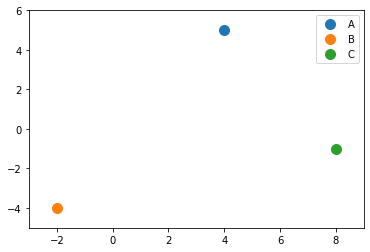

In [3]:
fig, ax = plt.subplots()
plt.plot(A[0], A[1], "o", markersize=10, label="A")
plt.plot(B[0], B[1], "o", markersize=10, label="B")
plt.plot(C[0], C[1], "o", markersize=10, label="C")

ax.set_xlim([-3, 9])
ax.set_ylim([-5, 6])
plt.legend()

#### 1.2. Which distance is longer, $AC, AB, \text{or} BC$? Write a function that calculates distance between two points.

In [4]:
def dist(a,b):
    return math.sqrt(((a[0]-b[0])**2) + ((b[1]-a[1])**2))

In [5]:
dist (A,C)

7.211102550927978

In [6]:
dist (A, B)

10.816653826391969

In [7]:
dist (B, C)

10.44030650891055

#### 1.3. What is the perimeter of triangle $ABC$?

In [8]:
dist (A, C) + dist (A, B) + dist (B, C)

28.4680628862305

### 2. Linear functions

Consider the following straight lines on 2D space:  
$y_1=2x-3$  
$y_2=-3x+12$  

#### 2.1. Plot them

In [9]:
x = np.linspace(
    start= -20, 
    stop= 20, 
    num=300
)

In [10]:
#Fórmula copiada de Sherriff en Classroom Materials, pero cambiando ciertos parámetros para que pueda ser aplicable a todas las gráficas
def initialize_grid():
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # where do we want lines
    ticks = np.arange(-20, 20, 2)
    
    # draw grid
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.grid(True, which='both')
    
    # 1-1 X and Y proportion
    ax.set_aspect('equal')
    
    # X and Y axes
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    
    # set axes' limits
    ax.set_xlim([-20, 20])
    ax.set_ylim([-20, 20])

In [11]:
y_1 = 2 * x - 3
y_2 = -3* x + 12

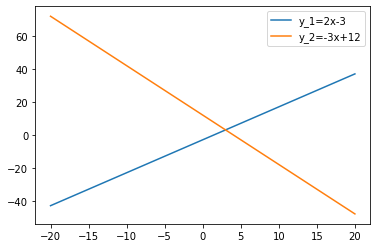

In [12]:
fig, ax = plt.subplots()
plt.plot(x, y_1, "-", markersize=10, label= "y_1=2x-3")
plt.plot(x, y_2, "-", markersize=10, label= "y_2=-3x+12")
plt.legend()

#### 2.2. What are the respective slopes

The slope of y_1 is 2 and the slope of y_2 is -3

#### 2.3. Give 3 points through which $y_1$ goes through

(0, -3)
(2, 1)
(4, 5)

#### 2.4. Where do they intersect?

We have to match the two functions:
(3, 3)

#### 2.5. BONUS 

My yearly salary has increased **linearly** with my age:  
When I was 21 years old, I did 10000\\$ / year    
Today I am 39 years old, I am doing 33400\\$ / year  
How much will I do when I get 50 years old?

### 3. Polynomials

Consider these different degree polynomials:  
$y_2=x^2-3x-10$  
$y_3=x^3-2x^2+5x+1$  
$y_4=x^4-x^3+x^2-x+1$  

In [13]:
def initialize_grid():
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # where do we want lines
    ticks = np.arange(-20, 20, 2)
    
    # draw grid
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.grid(True, which='both')
    
    # 1-1 X and Y proportion
    ax.set_aspect('equal')
    
    # X and Y axes
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    
    # set axes' limits
    ax.set_xlim([-20, 20])
    ax.set_ylim([-20, 20])

In [14]:
y_2 = x ** 2 - 3 * x - 10 
y_3 = x ** 3 - 2 *x ** 2 + 5 *x + 1 
y_4 = x **4 - x **3 + x *2 - x + 1

#### 3.1. Plot them

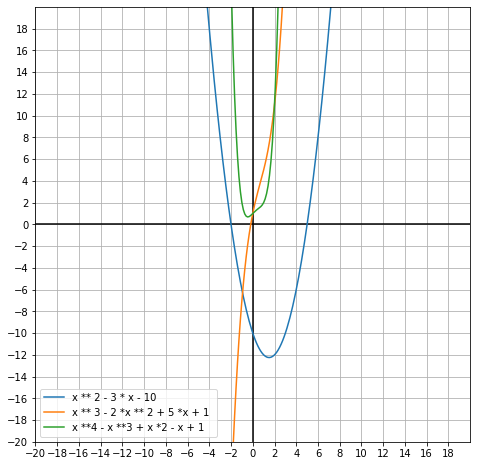

In [15]:
initialize_grid()
plt.plot(x, y_2, "-", label = "x ** 2 - 3 * x - 10")
plt.plot(x, y_3, "-", label="x ** 3 - 2 *x ** 2 + 5 *x + 1 ")
plt.plot(x, y_4, "-", label="x **4 - x **3 + x *2 - x + 1")
plt.legend()


#### 3.2. Which one takes a bigger value on $x=0$? On $x=2$? On $x=100$?

In [16]:
def bigger_value(n):
    x = n
    y_2 = x ** 2 - 3 * x - 10
    y_3 = x ** 3 - 2 *x ** 2 + 5 * x + 1
    y_4 = x ** 4 - x ** 3 + x ** 2 -x + 1
    
    return f"y_2 ={y_2}, y_3 ={y_3}, y_4 = {y_4} "
bigger_value(0)
bigger_value(2)
bigger_value(100)

'y_2 =9690, y_3 =980501, y_4 = 99009901 '

#### 3.3. Who is the vertex of parabola $y_2$?

In [17]:
y = x ** 2 -3 * x -10 
a = 1 
b = -3
c = -10

x = -(b)/ 2 * a
y = x ** 2 -3 * x -10 
print(x,y)

1.5 -12.25


#### 3.4. Where does $y_2$ intersect X axis? And Y axis?

In [18]:
x = (-2,0),(5,0)
y = (0,-10)

#### 3.5. As x gets very big, what happens to $y$ go in each case?

y gets bigger

#### 3.6. As x gets very small (big negative), what happens to $y$ go in each case?

y gets bigger

### 4. Exponential

#### 4.1. Print number $e$ rounded to 3 decimal figures

In [19]:
round(math.e, 3)

2.718

#### 4.2. Compute $e$ to the powers 0, 1, 2, 3, 10

In [20]:
print (math.e ** 0)
print (math.e ** 1)
print (math.e ** 2)
print (math.e ** 3)
print (math.e ** 10)

1.0
2.718281828459045
7.3890560989306495
20.085536923187664
22026.465794806703


#### 4.3. Compute $e$ to the powers 0, -1, -2, -3, -10

In [21]:
print (math.e ** 0)
print (math.e ** -1)
print (math.e ** -2)
print (math.e ** -3)
print (math.e ** -10)

1.0
0.36787944117144233
0.1353352832366127
0.04978706836786395
4.5399929762484875e-05


#### 4.4. Plot functions $e^x$, $e^{2x}$, $e^{-x}$

Note: choose an appropiate x-range to visualize them all toguether

### 5. Sum notation

Find the following:

$$\sum_{n=4}^7 n$$

In [22]:
4 + 5 + 6 + 7

22

$$\sum_{n=-2}^3 (n + 1)$$

In [23]:
(-2 + 1) + (-1 + 1) + (0 + 1) + (1 + 1) + (2 + 1) + (3 + 1)

9

$$\sum_{n=-2}^3 (n^2 - 2)$$

In [24]:
((-2**2) - 2) + ((-1**2) - 2) + ((0**2) - 2) + ((1**2) - 2) + ((2**2) - 2) + ((3**2) - 2) + ((4**2) - 2)

11

$$\sum_{n=0}^4 (10^n - 1)$$

In [25]:
((10**0) -1)  + ((10**1) -1) + ((10**2) -1) + ((10**3) -1) + ((10**4) -1)

11106

### 6. Combinatorics

#### 6.1. Ten people go to a party. How many handshakes happen?

10! / (2! (10 - 2)!)

In [26]:
(10 * 9) / 2 

45.0

#### 6.2. My family is composed of 11 members. By christmas, one buys food, one cooks and one cleans. How many possible arrangements of buyer-cooker-cleaner are there?

11! / (11 - 3)!

In [27]:
11 * 10 * 9

990

### BONUS

11 and 13 are twin primes, since:
 - they are both primes  
 - their distance is 2
 
Find all pairs of twin primes below 1000